# Lab 8: Logistic Regresion
#### Vaughn Neidert

## Introduction

The purpose of this experiment was to create and train models based on different features of our data set in order to predict the type of cancerous tumor a patient has. The data set, Wisconsin Diagnostic Breast Cancer, comes from the University of Wisconsin Madison, dated 1995. There are 569 entries in the data set with a 32 features, including the patient ID and the tumor type. In this experiement, there are three models trained. The first model was trained on a single feature of my choosing, based on an exploratory analysis of the data set. It had an accuracy of 86.7% and a root mean squared error of 0.313. The second model was trained using a greedy algorithm to select the most beneficial features. This was a significant improvement over the base model, having an accuracy of 93.7% and a root mean squared error of 0.201. The final model was trained using all of the provided features. It performed slightly comparably the greedy model, having an accuracy of 94.4% and a root mean squared error of 0.231. Based on the precision and recall scores, as well as the confusion matricies, the models tended to have more false negatives than false positives, which is problematic for the medical field in particular.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

## Loading and Cleaning the Data

The data set that we were provided did not have the names of the variables listed in the file itself. However, they were provided in a second file. There were a total of 10 variables, though each had 3 variations. A loop was used to form all combinations of the variables and types and add them to a single list of headers. These headers were then used in loading the data. The rest of the data was complete, so no real cleaning had to be conducted.

In [17]:
df = pd.read_csv('data_big.csv')
df = df.drop('artists', 1)
df = df.drop('id', 1)
df = df.drop('name', 1)
df = df.drop('release_date', 1)

## Exploratory Analysis

In [45]:
df.sort_values(by=['popularity'], ascending=False).head(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
87942,0.00146,0.514,200040,0.730,0,0.000095,1,0.0897,-5.934,1,100,0.0598,171.005,0.334,2020
87940,0.24700,0.746,181733,0.690,1,0.000000,11,0.1010,-7.956,1,99,0.1640,89.977,0.497,2020
87949,0.73100,0.726,173333,0.431,0,0.000000,8,0.6960,-8.765,0,97,0.1350,144.026,0.348,2020
87941,0.23300,0.716,165978,0.537,1,0.000000,0,0.1570,-7.648,0,96,0.0514,129.979,0.280,2020
87852,0.06860,0.674,176547,0.774,0,0.001880,11,0.3930,-7.567,0,95,0.0892,112.050,0.330,2019
87946,0.32100,0.834,247059,0.454,1,0.000006,1,0.1140,-9.750,0,95,0.2010,81.618,0.837,2020
87840,0.10400,0.896,196653,0.586,1,0.000000,10,0.7900,-6.687,0,95,0.0559,116.971,0.642,2019
87844,0.30500,0.863,223480,0.631,1,0.000030,7,0.1230,-4.689,1,95,0.0534,128.977,0.817,2019
87943,0.74900,0.728,147800,0.431,0,0.000000,6,0.0996,-9.966,0,94,0.0622,130.022,0.629,2020
87951,0.02640,0.611,132303,0.688,1,0.000000,1,0.2510,-5.688,1,94,0.3410,178.462,0.393,2020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

### Range and Distribution of Each Variable

Range: 0.0-0.996


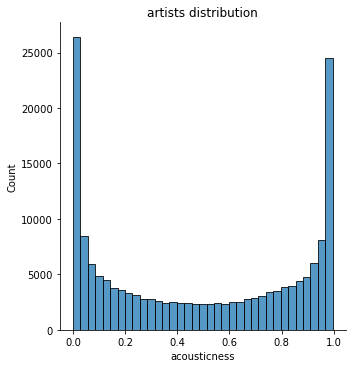

Range: 0.0-0.988


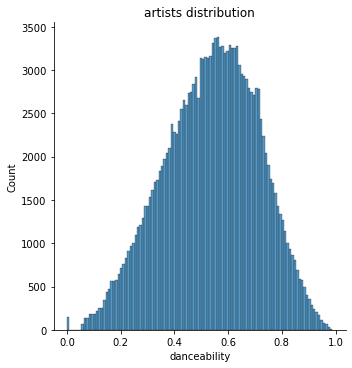

Range: 5108-5403500


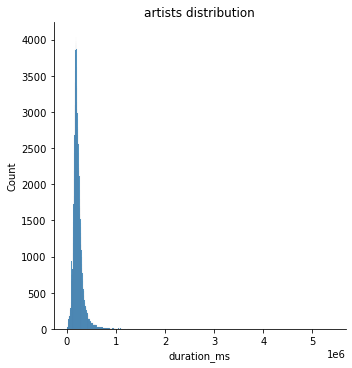

Range: 0.0-1.0


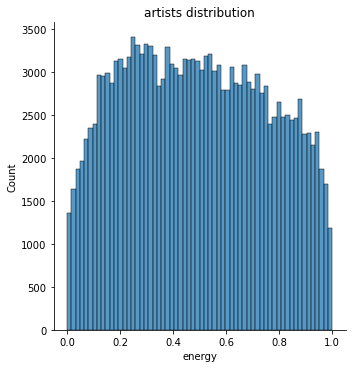

Range: 0-1


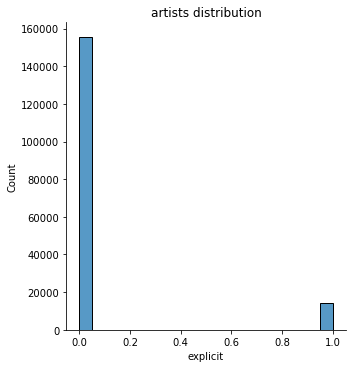

Range: 0.0-1.0


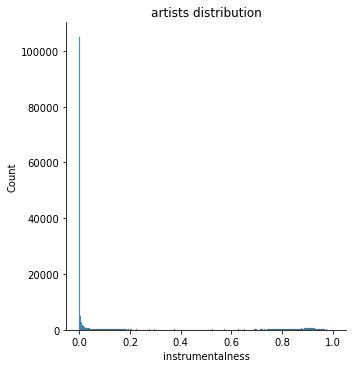

Range: 0-11


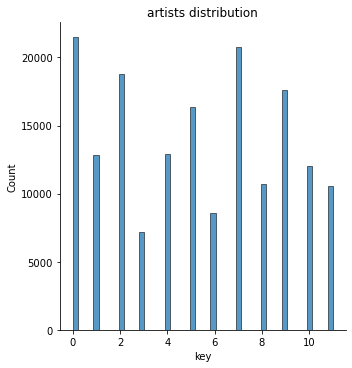

Range: 0.0-1.0


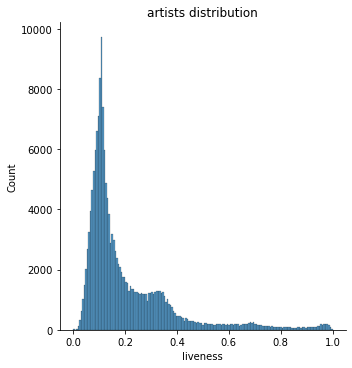

Range: -60.0-3.855


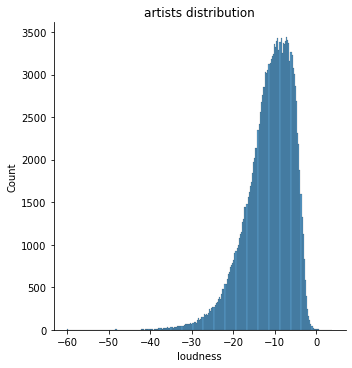

Range: 0-1


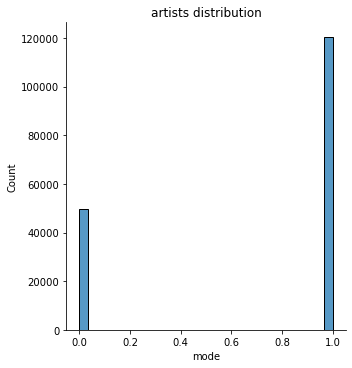

Range: 0-100


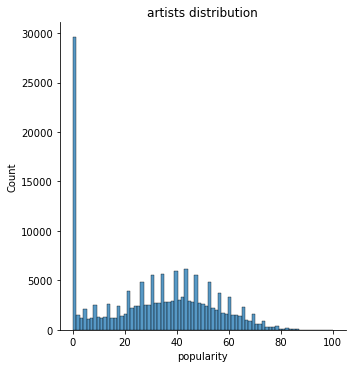

Range: 0.0-0.969


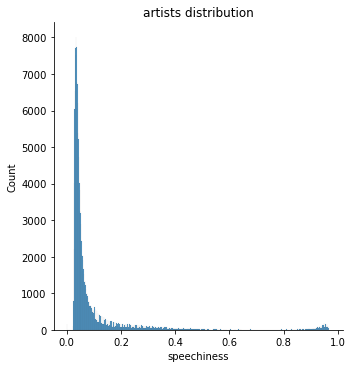

Range: 0.0-244.091


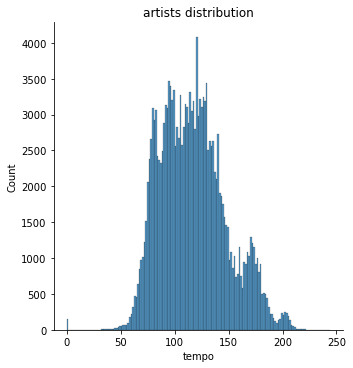

Range: 0.0-1.0


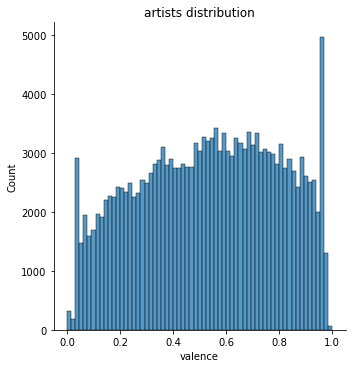

Range: 1921-2020


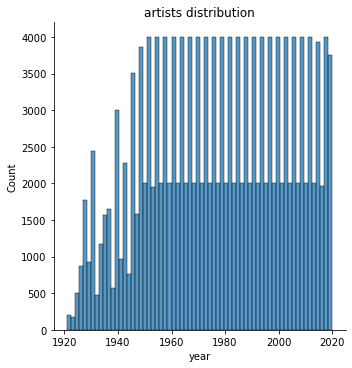

In [18]:
for column in df:
    sns.displot(x=df[column])
    plt.title(header + " distribution")
    print("Range: " + str(df[column].min()) + '-' + str(df[column].max()))
    plt.show()

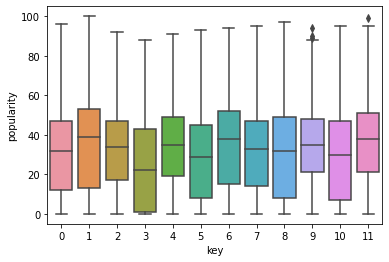

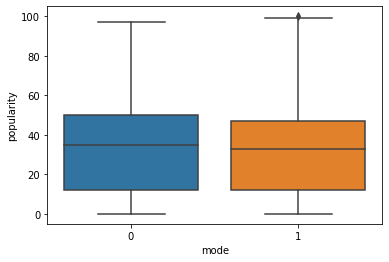

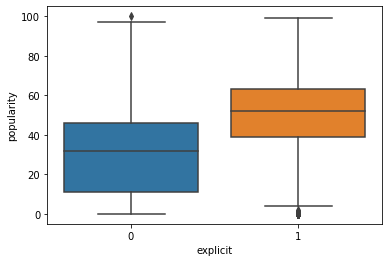

In [22]:
for column in ['key', 'mode', 'explicit']:
    sns.boxplot(x=df[column], y=df['popularity'])
    plt.show()

## Scaling the Data

In order to scale this data down, I used the MinMaxScaler provided by Scikit-learn

In [30]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.998996,0.716599,0.028442,0.1950,0.0,0.563,0.909091,0.1510,0.745000,1.0,0.00,0.052219,0.485348,0.7790,0.070707
1,0.997992,0.383603,0.051316,0.0135,0.0,0.901,0.727273,0.0763,0.494026,1.0,0.00,0.047678,0.344019,0.0767,0.070707
2,0.606426,0.758097,0.018374,0.2200,0.0,0.000,0.454545,0.1190,0.627609,0.0,0.00,0.958720,0.439086,0.8800,0.070707
3,0.998996,0.790486,0.032538,0.1300,0.0,0.887,0.090909,0.1110,0.708887,0.0,0.00,0.095562,0.442470,0.7200,0.070707
4,0.993976,0.212551,0.126450,0.2040,0.0,0.908,1.000000,0.0980,0.676079,1.0,0.01,0.043756,0.254614,0.0693,0.070707


## Splitting the Data

The data was split into train and test data using the scaled data. The data was split further into y_train and y_test using a LabelEncoder.

In [38]:
df_train, df_test = train_test_split(df_scaled)

In [39]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train['popularity'])
y_test = encoder.transform(df_test['popularity'])

## Baseline Model

This model was trained using a single variable. In this case, I elected to use the **concavity mean** variable, as I thought that it looked predictive between the two tumor types when look at the above graphs.

In [48]:
X_train = df_train[["energy"]].astype("float64").values
X_test = df_test[["energy"]].astype("float64").values

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

simple_lr = SGDClassifier(max_iter=10000, loss="log")
simple_lr.fit(X_train, y_train)
pred_labels = simple_lr.predict(X_test)
pred_prob = simple_lr.predict_proba(X_test)

null_accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)

print("Accuracy:", null_accuracy)
print("Confusion matrix:")
print(cm)

Accuracy: 0.16563868355383962
Confusion matrix:
[[6813    0    0 ...    0    0    0]
 [ 547    0    0 ...    0    0    0]
 [ 360    0    0 ...    0    0    0]
 ...
 [   3    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


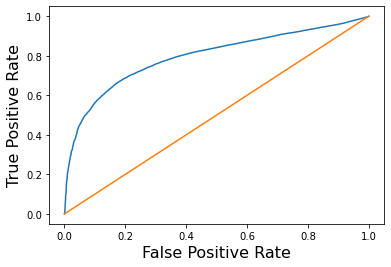

RMSE: 0.34132088898911456


In [49]:
pred_proba = simple_lr.predict_proba(X_test)

# turn multiclass problem into binary problem
pred_proba_1 = 1.0 - pred_proba[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_proba_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.show()
print('RMSE:', np.sqrt(mean_squared_error(y_test_1, pred_proba_1)))

## Greedy Algorithm

This model was trained using an algorithm to select the most beneficial features from the data. The algorithm runs through all of the features and checks if they improve the accuracy and loss of the model. If the feature does improve these, it is added to the model. Otherwise, it is left out.

In [50]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = SimpleImputer()
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

In [52]:
print("Null Model Accuracy:", null_accuracy)

column_accuracies = []

for col_name in df:
    X_train, X_test = create_feature_matrices(df_train,
                                             df_test,
                                             [col_name],
                                             [])
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(X_train, y_train)
    pred_labels = simple_lr.predict(X_test)
    pred_probs = simple_lr.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    print()
    print(col_name + " Accuracy:", simple_accuracy)
    column_accuracies.append((simple_accuracy, col_name))
    
column_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col_name for _, col_name in column_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

Null Model Accuracy: 0.16563868355383962

acousticness Accuracy: 0.1610480719431235

danceability Accuracy: 0.1619897358632704

duration_ms Accuracy: 0.15817599698667545

energy Accuracy: 0.1655916003578323

explicit Accuracy: 0.1619897358632704

instrumentalness Accuracy: 0.1619897358632704

key Accuracy: 0.1619897358632704

liveness Accuracy: 0.1619897358632704

loudness Accuracy: 0.1619897358632704

mode Accuracy: 0.1619897358632704

popularity Accuracy: 0.180564056688168

speechiness Accuracy: 0.1619897358632704

tempo Accuracy: 0.1619897358632704

valence Accuracy: 0.1619897358632704

year Accuracy: 0.18105843024624513

Sorted columns:['year', 'popularity', 'energy', 'danceability', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'acousticness', 'duration_ms']


In [55]:
base_model_columns = []
base_accuracy = null_accuracy

print("Base Model Accuracy:", base_accuracy)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train,
                                             df_test,
                                             trial_columns,
                                             [])
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))

Base Model Accuracy: 0.16563868355383962


['year'] Model Accuracy: 0.18254155092047647
Updating base model

Base Model Accuracy: 0.18254155092047647


['year', 'popularity'] Model Accuracy: 0.19483026507839352
Updating base model

Base Model Accuracy: 0.19483026507839352


['year', 'popularity', 'energy'] Model Accuracy: 0.2095673054286925
Updating base model

Base Model Accuracy: 0.2095673054286925


['year', 'popularity', 'energy', 'danceability'] Model Accuracy: 0.19984462545317577

Base Model Accuracy: 0.2095673054286925


['year', 'popularity', 'energy', 'explicit'] Model Accuracy: 0.19770234003484158

Base Model Accuracy: 0.2095673054286925


['year', 'popularity', 'energy', 'instrumentalness'] Model Accuracy: 0.20568294175808655

Base Model Accuracy: 0.2095673054286925


['year', 'popularity', 'energy', 'key'] Model Accuracy: 0.19565422100852206

Base Model Accuracy: 0.2095673054286925


['year', 'popularity', 'energy', 'liveness'] Model Accuracy: 0.19892650313103252

Base Mode

In [56]:
X_train, X_test = create_feature_matrices(df_train,
                                          df_test,
                                          base_model_columns,
                                          [])
    
lr = SGDClassifier(max_iter=10000, loss="log")
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
trial_accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)
print("Model Accuracy:", trial_accuracy)
print("Confusion matrix:")
print(cm)
calc_prec_rec(cm)

Model Accuracy: 0.19956212627713169
Confusion matrix:
[[6881    0    0 ...    0    0    0]
 [ 561    0    0 ...    0    0    0]
 [ 369    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Precision: nan
Recall: 3.5295588521295818


<ipython-input-34-3c251b7b0577>:5: RuntimeWarning: invalid value encountered in true_divide
  precision = np.sum(true_pos / (true_pos + false_pos))


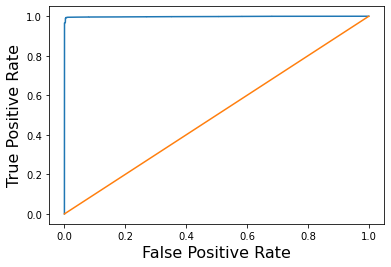

RMSE: 0.2131308793053171


In [57]:
pred_proba = lr.predict_proba(X_test)

# turn multiclass problem into binary problem
pred_proba_1 = 1.0 - pred_proba[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_proba_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.show()

print('RMSE:', np.sqrt(mean_squared_error(y_test_1, pred_proba_1)))

## All Variables

This model was created using all 30 of the available features. A feature matrix is made from the all of the columns using the all of the variables and the train and test data sets.

In [58]:
X_train, X_test = create_feature_matrices(df_train,
                                          df_test,
                                          df_test.columns,
                                          [])
lr = SGDClassifier(max_iter=10000, loss="log")
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
trial_accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)
print("Model Accuracy:", trial_accuracy)
print("Labels:", encoder.classes_)
print("Confusion matrix:")
print(cm)

Model Accuracy: 0.1958896369885588
Labels: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.99 1.  ]
Confusion matrix:
[[6881    0    0 ...    0    0    0]
 [ 559    2    0 ...    0    0    0]
 [ 366    1    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Precision: nan
Recall: 3.5018451979165937


<ipython-input-34-3c251b7b0577>:5: RuntimeWarning: invalid value encountered in true_divide
  precision = np.sum(true_pos / (true_pos + false_pos))


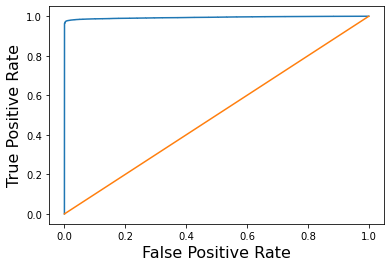

RMSE: 0.1932007928827079


In [59]:
pred_proba = lr.predict_proba(X_test)

# turn multiclass problem into binary problem
pred_proba_1 = 1.0 - pred_proba[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_proba_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.show()
print('RMSE:', np.sqrt(mean_squared_error(y_test_1, pred_proba_1)))

## Model Evaluations

**Highest RMSE Model:** Base Model: RMSE = 0.313   
**Lowest RMSE Model:** Greedy Algorithm Model: RMSE = 0.201

Based off of the confusion matrices, we can tell what types of errors these models are making, in terms of false positives and negatives. Our first model, the baseline, had 5 false positives and 14 false negatives. Our second model, the model trained using the greedy algorithm, had 2 false positives and 7 false negatives. Finally, the final model, trained with all of the variables, was 5 false positives and 3 false negatives. In general, the models mostly made errors in false negatives. This would mean that the models were predicting that the patient had a tumor of type B when in reality they had one of type M. In general, I would argue that false negatives are far worse than false positives. The two mean almost the same thing in this problem, as every patient has one tumor or the other. If it were a different medical condition we were predicting, say other forms of cancer, then there would be dire consequences. If a model was predicting false negatives, which would mean that the patient does not have cancer when they truly do, there are all sorts of issues that arise from there. Diagnosing a patient with something they do not have is a far easier problem to solve than missing a life-threating diagnosis.